# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
ideb = pd.read_csv('/content/drive/MyDrive/Sirius/Atividades_semana1/ideb.csv')
pib = pd.read_csv('/content/drive/MyDrive/Sirius/Atividades_semana1/pib.csv')
seg_rj = pd.read_csv('/content/drive/MyDrive/Sirius/Atividades_semana1/seg_rj.csv')

Mounted at /content/drive


### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [ ]:
# Filtrar os dados apenas para o ano de 2019
ideb_2019 = ideb[ideb['ano'] == 2019]

# Selecionar as colunas desejadas
ideb_2019 = ideb_2019[['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]

# Agrupar os dados por município
ideb_agrupado = ideb_2019.groupby('id_municipio').mean().reset_index()

In [ ]:

ideb_agrupado


,id_municipio,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,1100015,2019.0,253.283750,242.246250,5.050000
1,1100023,2019.0,248.223750,243.618750,4.762500
2,1100031,2019.0,229.495000,221.500000,4.850000
3,1100049,2019.0,259.150000,249.888889,5.200000
4,1100056,2019.0,266.288571,254.334286,5.642857
...,...,...,...,...,...
5565,5222005,2019.0,272.708571,262.805714,6.000000
5566,5222054,2019.0,271.685714,264.780000,5.828571
5567,5222203,2019.0,241.580000,231.394286,4.657143
5568,5222302,2019.0,269.355000,269.730000,4.950000


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [ ]:
# Filtrar os dados apenas para o ano de 2019
pib_2019 = pib[pib['ano'] == 2019]

# Selecionar as colunas desejadas
pib_2019 = pib_2019[['ano', 'id_municipio', 'pib', 'impostos_liquidos']]

# Agrupar os dados por município
pib_agrupado = pib_2019.groupby('id_municipio').sum().reset_index()

In [ ]:
pib_agrupado

,id_municipio,ano,pib,impostos_liquidos
0,1100015,2019,495628767,29350985
1,1100023,2019,2578829725,284397627
2,1100031,2019,139959390,5997974
3,1100049,2019,2260643565,253988284
4,1100056,2019,506854457,76671376
...,...,...,...,...
5565,5222005,2019,483663323,37741787
5566,5222054,2019,342355634,33561723
5567,5222203,2019,113668466,8405675
5568,5222302,2019,206971225,7933047


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [ ]:
resultado = ideb_agrupado.merge(pib_agrupado, on='id_municipio')
resultado


,id_municipio,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
0,1100015,2019.0,253.283750,242.246250,5.050000,2019,495628767,29350985
1,1100023,2019.0,248.223750,243.618750,4.762500,2019,2578829725,284397627
2,1100031,2019.0,229.495000,221.500000,4.850000,2019,139959390,5997974
3,1100049,2019.0,259.150000,249.888889,5.200000,2019,2260643565,253988284
4,1100056,2019.0,266.288571,254.334286,5.642857,2019,506854457,76671376
...,...,...,...,...,...,...,...,...
5565,5222005,2019.0,272.708571,262.805714,6.000000,2019,483663323,37741787
5566,5222054,2019.0,271.685714,264.780000,5.828571,2019,342355634,33561723
5567,5222203,2019.0,241.580000,231.394286,4.657143,2019,113668466,8405675
5568,5222302,2019.0,269.355000,269.730000,4.950000,2019,206971225,7933047


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [ ]:
# Verificar dados faltantes
dados_faltantes = resultado.isna().sum()
print("Dados faltantes por coluna:")
print(dados_faltantes)

# Verificar as colunas irrelevantes
print("Colunas do DataFrame:")
print(resultado.columns)

# Aqui daria para identificar alguma coluna irrelevante, para assim descartá-la
# Para descartar basta atualizar o resultado com a fórmula:  resultado = resultado.drop(columns=['coluna_irrelevante'])


Dados faltantes por coluna:
id_municipio                    0
ano_x                           0
nota_saeb_matematica           21
nota_saeb_lingua_portuguesa    21
ideb                           21
ano_y                           0
pib                             0
impostos_liquidos               0
dtype: int64
Colunas do DataFrame:
Index(['id_municipio', 'ano_x', 'nota_saeb_matematica',
       'nota_saeb_lingua_portuguesa', 'ideb', 'ano_y', 'pib',
       'impostos_liquidos'],
      dtype='object')


In [ ]:
resultado = resultado.drop(columns=['ano_x'])
resultado = resultado.drop(columns=['ano_y'])

Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [ ]:
# Verificando os tipos das variáveis
tipos_de_variaveis = resultado.dtypes
print("Tipos das variáveis:")
print(tipos_de_variaveis)


Tipos das variáveis:
id_municipio                     int64
ano_x                          float64
nota_saeb_matematica           float64
nota_saeb_lingua_portuguesa    float64
ideb                           float64
ano_y                            int64
pib                              int64
impostos_liquidos                int64
dtype: object


sua resposta

Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas? Será que municípios com alta nota no Ideb possuem um PIB alto?

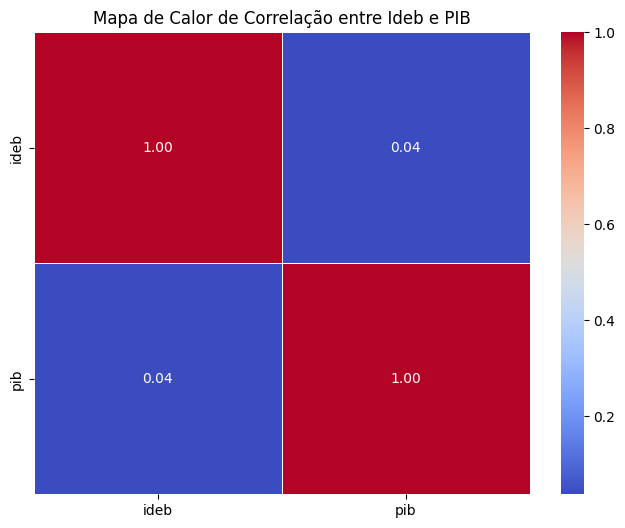

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlacao = resultado[['ideb', 'pib']].corr()

# Criando um mapa de calor com a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Ideb e PIB')
plt.show()

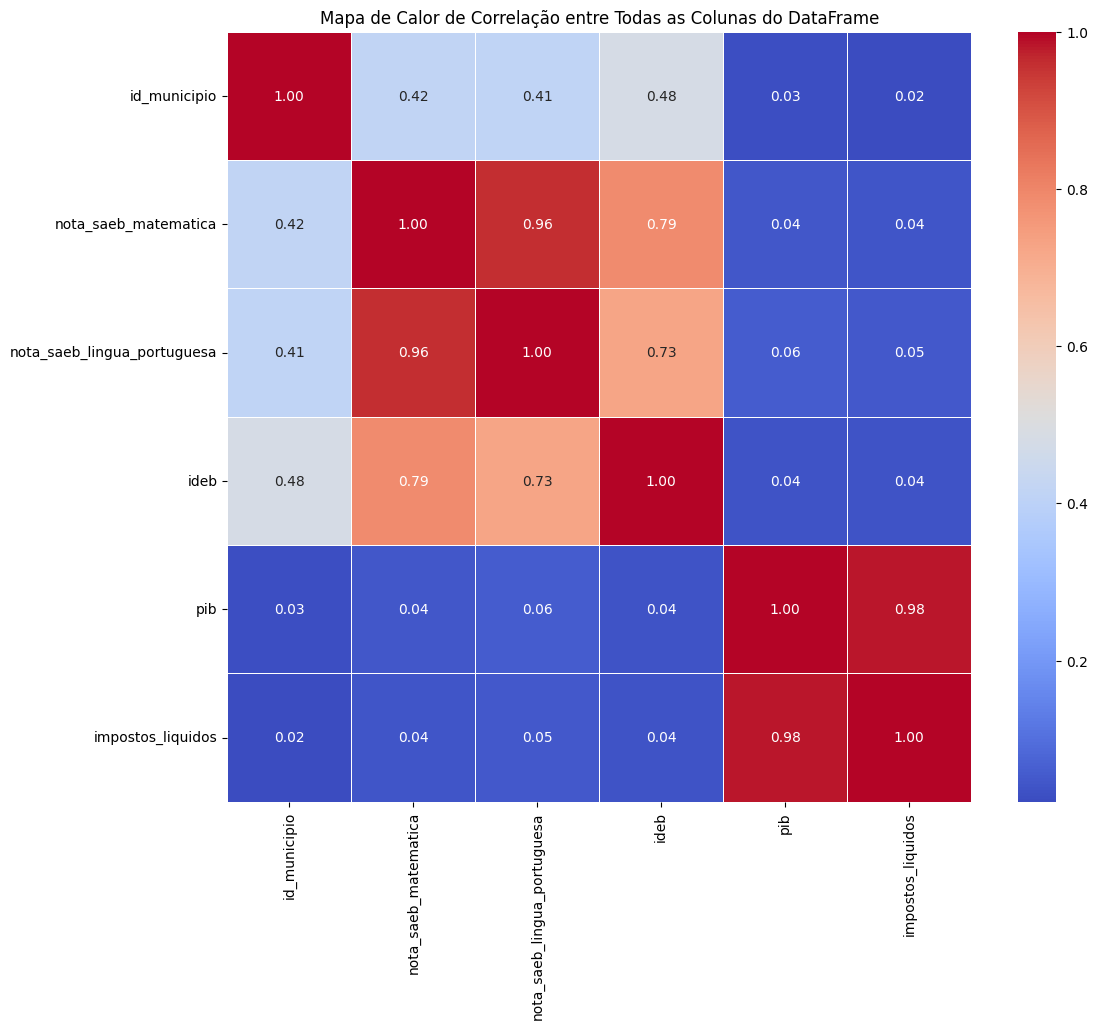

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a matriz de correlação entre todas as colunas
matriz_correlacao = resultado.corr()

# Criar um mapa de calor com a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlação entre Todas as Colunas do DataFrame')
plt.show()


O que significa a correlação das variáveis `id_municipio` e `ideb`?


sua resposta:
correlação 0.48
é uma correlação positiva, não é perfeita, mas dá para dizer que existe.


As variáveis se movem na mesma direção, mas a magnitude da correlação não é perfeita.

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e observar os dados do dataframe.

In [ ]:
seg_rj

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,...,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,...,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,...,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,...,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,...,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2021,2,2021m02,1.41,0.02,0.07,1.50,0.85,2.35,1.91,...,4.71,0.20,23.65,1.68,0.14,0.03,3.75,0.00,281.30,3.0
218,2021,3,2021m03,1.80,0.04,0.05,1.89,0.91,2.79,2.36,...,6.13,0.20,26.01,1.88,0.13,0.01,3.75,0.00,311.49,3.0
219,2021,4,2021m04,1.73,0.02,0.04,1.79,0.81,2.60,1.93,...,5.04,0.15,22.30,1.59,0.11,0.03,5.63,0.00,274.01,2.0
220,2021,5,2021m05,1.52,0.01,0.03,1.57,0.64,2.21,1.95,...,5.56,0.25,23.08,1.64,0.17,0.01,1.88,11.56,286.05,2.0


### Atividade 8: Filtrar os dados ano de 2020 e selecionar as variáveis: mês, hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial, e trafico_drogas. Em seguida calcular a correlação de spearman e identificar quais são as correlações fortes e muito fortes (se houver).

In [ ]:
# Filtrando os dados para o ano de 2020
seg_rj_2020 = seg_rj[seg_rj['ano'] == 2020]

In [ ]:
# Selecionando as variáveis
variaveis_selecionadas = seg_rj_2020[['mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'trafico_drogas']]


In [ ]:
# Calculando a correlação de Spearman
correlacao_spearman = variaveis_selecionadas.corr(method='spearman')

In [ ]:
# Identificando as correlações fortes e muito fortes (geralmente, coeficiente > 0.7)
correlacoes_fortes = correlacao_spearman[(correlacao_spearman > 0.7) & (correlacao_spearman < 1.0)]
correlacoes_muito_fortes = correlacao_spearman[correlacao_spearman == 1.0]


In [ ]:
# Exiba as correlações fortes e muito fortes
print("Correlações Fortes:")
print(correlacoes_fortes)

print("\nCorrelações Muito Fortes:")
print(correlacoes_muito_fortes)

Correlações Fortes:
                         mes  hom_doloso  lesao_corp_morte  latrocinio  \
mes                      NaN         NaN               NaN         NaN   
hom_doloso               NaN         NaN               NaN         NaN   
lesao_corp_morte         NaN         NaN               NaN         NaN   
latrocinio               NaN         NaN               NaN         NaN   
cvli                     NaN    0.993007               NaN         NaN   
hom_por_interv_policial  NaN         NaN               NaN         NaN   
trafico_drogas           NaN         NaN               NaN         NaN   

                             cvli  hom_por_interv_policial  trafico_drogas  
mes                           NaN                      NaN             NaN  
hom_doloso               0.993007                      NaN             NaN  
lesao_corp_morte              NaN                      NaN             NaN  
latrocinio                    NaN                      NaN             NaN  
cv

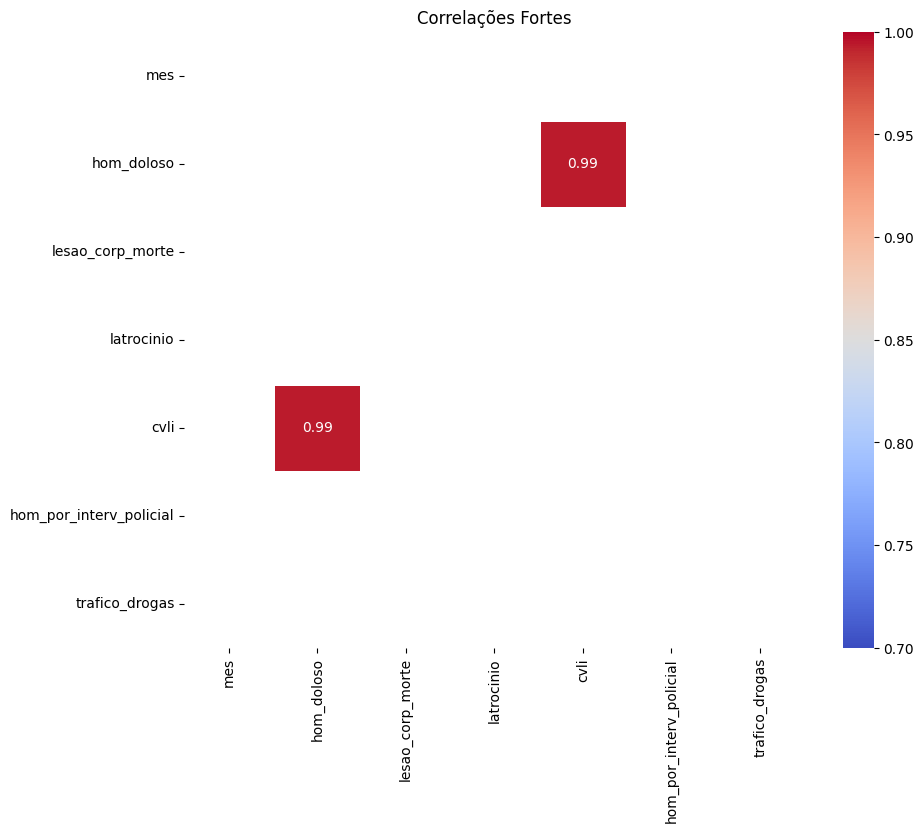

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotando as correlações fortes
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_fortes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, vmin=0.7, vmax=1)
plt.title('Correlações Fortes')
plt.show()



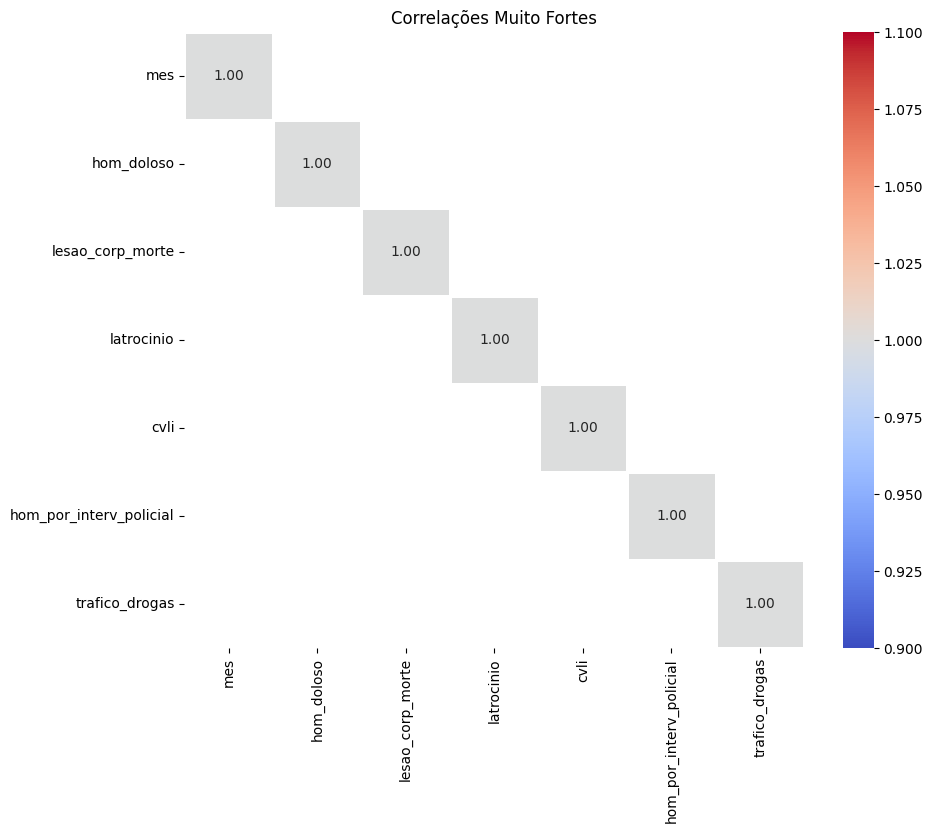

In [ ]:
# Plotando as correlações muito fortes
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes_muito_fortes, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlações Muito Fortes')
plt.show()